Machine Intelligence: Exercise Sheet 3 – Belugas on the run

In [2]:
import numpy as np 
import matplotlib.pyplot as plt

#Definitions:

data_set = np.array([(-1, -.1), (.3, .5), (2, .5)])

x = data_set[:,0]
y = data_set[:,1]

X = np.array([[1,1,1], x])
H = np.dot(X, X.T)
b = - np.dot(X, y.T)

w_1 = [-.45, .2]

g = lambda w: np.dot(H,w) + b
norm = lambda x: np.sqrt(np.dot(x,x))



Text(0.5, 0, 'time')

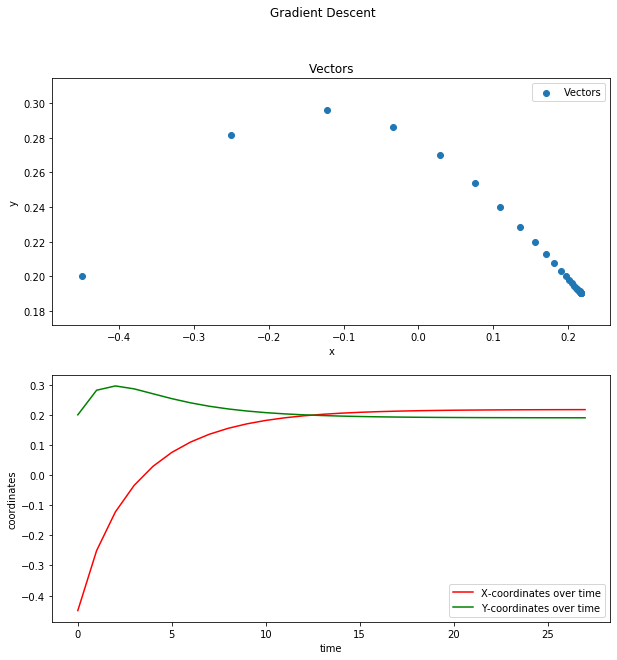

In [10]:
#Gradient descent:

gradient_update = lambda w, eta: w - eta * g(w)
def gradient_descent (w, eta):
    
    vecs = np.array([w])
    i = 1
    
    while (norm(g(w)) > .001):
        
        w = gradient_update(w, eta)
        
        vecs_temp = np.zeros((i+1,2))
        vecs_temp[0:i] = vecs[0:i]
        vecs_temp[i] = w 
        vecs = vecs_temp.copy()
        
        i += 1 
        
        
    return vecs

vecs = gradient_descent(w_1, .1)

x_coords = vecs[:,0]
y_coords = vecs[:,1]

fig, (ax1, ax2) = plt.subplots(2,1, sharey = False, sharex = False, figsize = (10,10))

fig.suptitle('Gradient Descent')

ax1.scatter(x_coords,y_coords, label = 'Vectors')
ax1.set_title('Vectors')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.legend()

ax2.plot(np.arange(0,len(x_coords)), x_coords, label = 'X-coordinates over time', color = 'red')
ax2.plot(np.arange(0,len(x_coords)), y_coords, label = 'Y-coordinates over time', color = 'green')
ax2.legend()
ax2.set_ylabel('coordinates')
ax2.set_xlabel('time')

Text(0.5, 0, 'time')

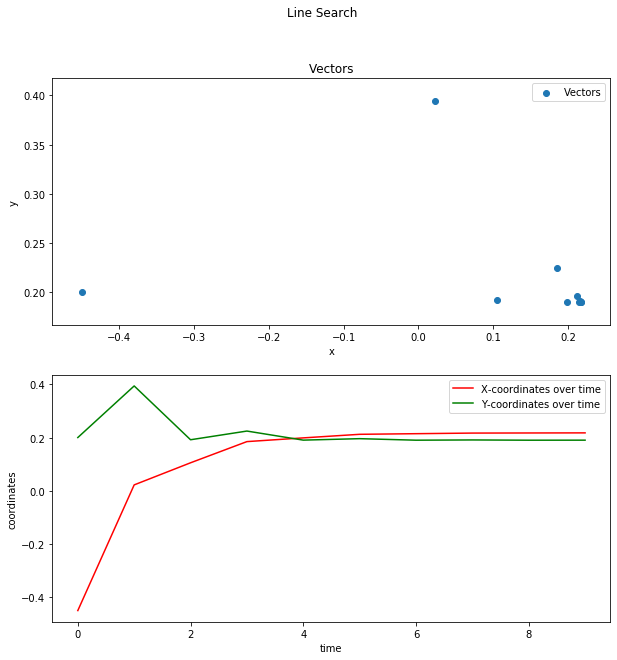

In [14]:
#Part (b): Line Search

optimal_eta = lambda w: np.dot(g(w), g(w)) / np.dot(g(w), np.dot(H, g(w)))

def line_search(w):
    
    vecs = np.array([w])
    i = 1
    
    while (norm(g(w)) > .001):
        
        eta = optimal_eta(w)
        
        w = gradient_update(w, eta)
        
        vecs_temp = np.zeros((i+1,2))
        vecs_temp[0:i] = vecs[0:i]
        vecs_temp[i] = w 
        vecs = vecs_temp.copy()
        
        i += 1 
        
        
    return vecs

vecs_2 = line_search(w_1)

x_coords_2 = vecs_2[:,0]
y_coords_2 = vecs_2[:,1]

fig, (ax1, ax2) = plt.subplots(2,1, sharey = False, sharex = False, figsize = (10,10))


fig.suptitle('Line Search')

ax1.scatter(x_coords_2,y_coords_2, label = 'Vectors')
ax1.set_title('Vectors')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.legend()

ax2.plot(np.arange(0,len(x_coords_2)), x_coords_2, label = 'X-coordinates over time', color = 'red')
ax2.plot(np.arange(0,len(x_coords_2)), y_coords_2, label = 'Y-coordinates over time', color = 'green')
ax2.legend()
ax2.set_ylabel('coordinates')
ax2.set_xlabel('time')



[[-0.45        0.2       ]
 [ 0.02213089  0.39383464]
 [ 0.21767305  0.18998527]]


Text(0.5, 0, 'time')

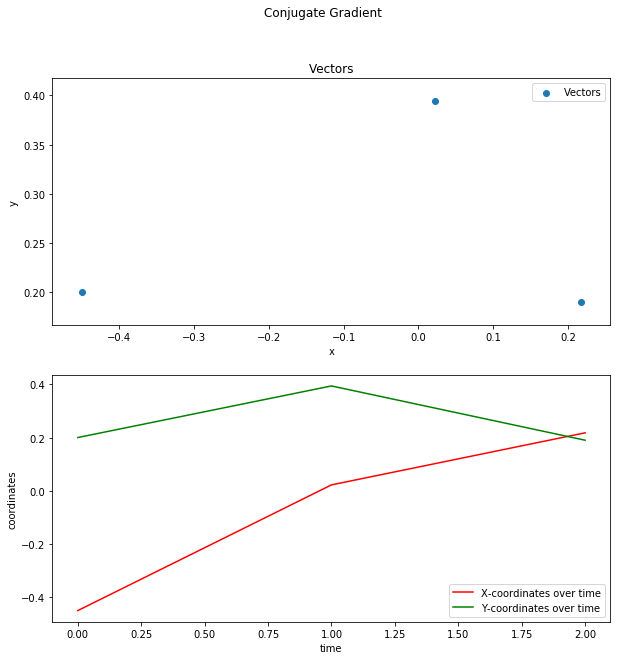

In [17]:
#Part (c): Conjugate gradient


def conj_gradient (w):
    
    d = -g(w)
    vecs = np.array([w])
    i = 1
    
    while (norm(g(w))> .001):
        
        eta = np.dot(d, g(w)) / np.dot(d, np.dot(H, d))
        g_old = g(w)
        w = w - eta * d
        beta = np.dot(g(w),g(w)) / np.dot(g_old, g_old)
        d = g(w) - beta * d
        
        vecs_temp = np.zeros((i+1,2))
        vecs_temp[0:i] = vecs[0:i]
        vecs_temp[i] = w 
        vecs = vecs_temp.copy()
        
        i += 1 
        
        
    return vecs

print(conj_gradient(w_1))

vecs_3 = conj_gradient(w_1)

x_coords_3 = vecs_3[:,0]
y_coords_3 = vecs_3[:,1]



fig, (ax1, ax2) = plt.subplots(2,1, sharey = False, sharex = False, figsize = (10,10))

fig.suptitle('Conjugate Gradient')

ax1.scatter(x_coords_3,y_coords_3, label = 'Vectors')
ax1.set_title('Vectors')
ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.legend()

ax2.plot(np.arange(0,len(x_coords_3)), x_coords_3, label = 'X-coordinates over time', color = 'red')
ax2.plot(np.arange(0,len(x_coords_3)), y_coords_3, label = 'Y-coordinates over time', color = 'green')
ax2.legend()
ax2.set_ylabel('coordinates')
ax2.set_xlabel('time')